### Debugging ###

1. Sometimes two methods of computing autocorrelation give different results.
2. The manual hmc is inconsistent with the torch hmc.


In [1]:
import numpy as np
from hmc_u1_torch import HMC_U1
from field_transformations import manual_field_transformation
from nn_model_simple import NNFieldTransformation
from utils import plot_results, compute_autocorrelation, compute_autocorrelation_by_def, plaquette_value, calculate_plaquette_from_field

In [2]:
# Parameters
""" 
total_time = n_steps * step_size should be around 1 to 2 units.
If the energy conservation is not good, try to reduce the step size.
"""

lattice_size = 16
volume = lattice_size ** 2
beta = 3
n_thermalization_steps = 100
n_steps = 100
step_size = 0.05
n_iterations = 200

# Initialize HMC
hmc = HMC_U1(lattice_size, beta, n_thermalization_steps, n_steps, step_size)

>>> No Field Transformation


Thermalizing:   0%|          | 0/100 [00:00<?, ?it/s]

Running HMC: 100%|██████████| 200/200 [00:03<00:00, 57.66it/s]


Expected plaquette value for beta = 3: 0.8099852939565045
Real plaquette value from final configuration: 0.806026122654482


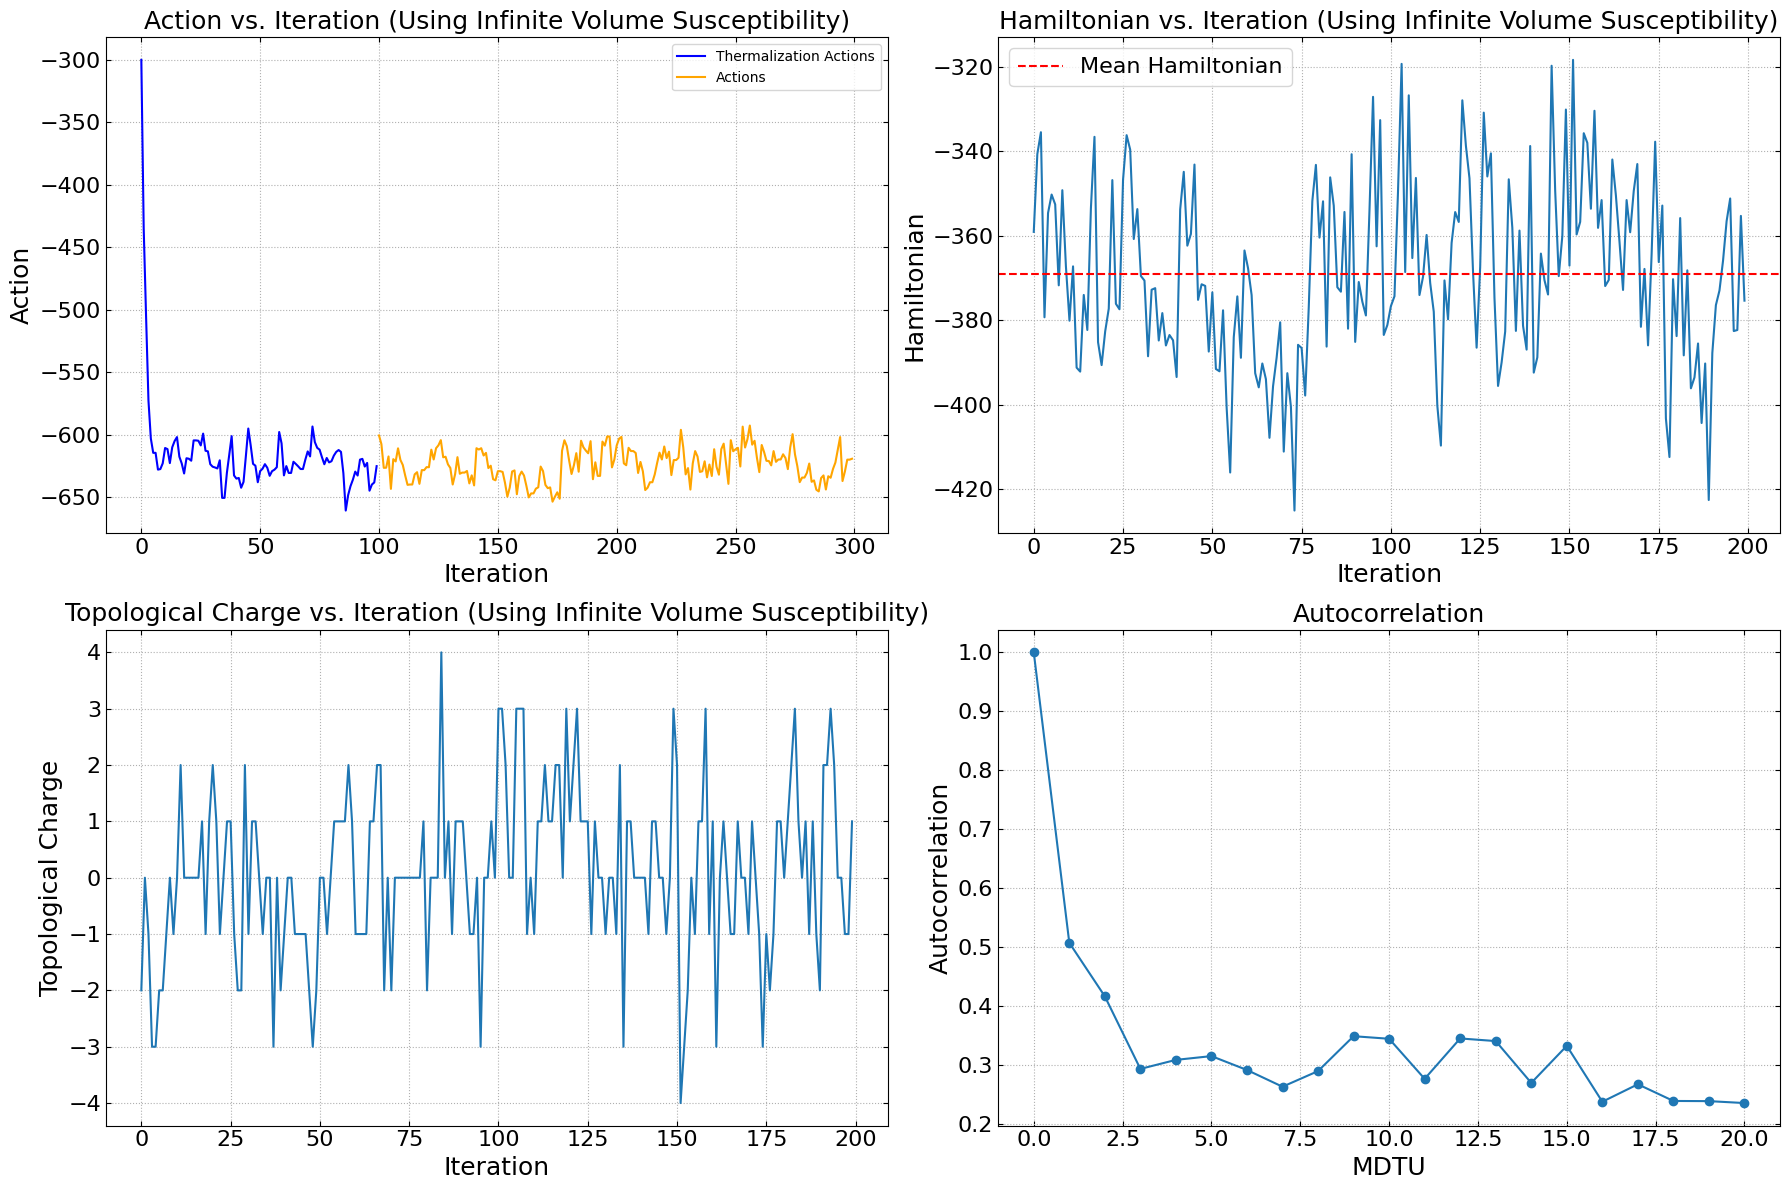

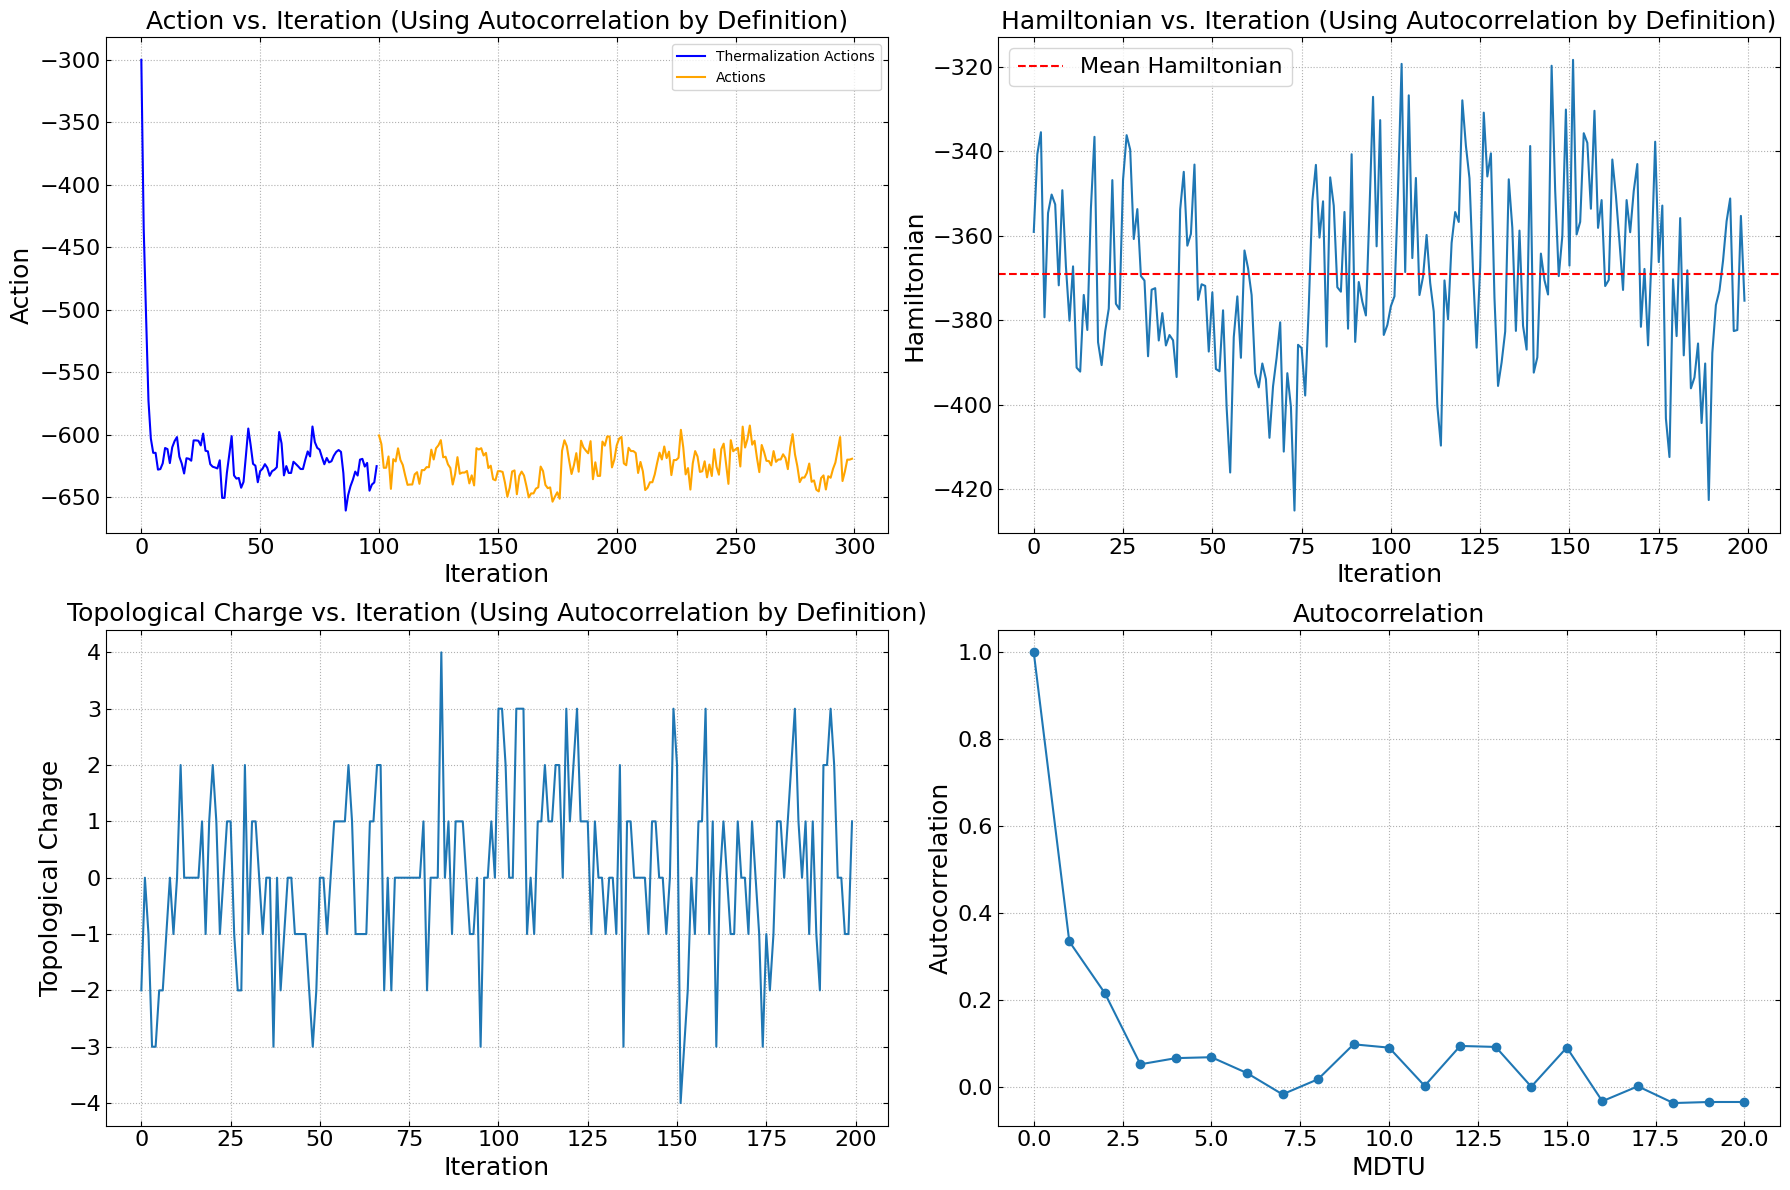

Thermalization acceptance rate: 0.9500
Acceptance rate: 0.9400
Relative variation of Hamiltonian (delta H / H_mean): -0.2895
Variation of topological charge (delta Q): 8.0000
>>> Simulation completed


In [3]:
print(">>> No Field Transformation")

# Thermalize the system
theta_thermalized, thermalization_actions, thermalization_acceptance_rate = hmc.thermalize()

# Run HMC without field transformation
final_config, actions, acceptance_rate, topological_charges, hamiltonians = hmc.run(n_iterations, theta_thermalized)

# Convert to numpy arrays
thermalization_actions = thermalization_actions.cpu().numpy()
actions = actions.cpu().numpy()
hamiltonians = hamiltonians.cpu().numpy()
final_config = final_config.cpu().numpy()
topological_charges = topological_charges.cpu().numpy()

# Calculate expected and actual plaquette values
expected_plaquette = plaquette_value(beta)
real_plaquette = calculate_plaquette_from_field(final_config)
print(f"Expected plaquette value for beta = {beta}: {expected_plaquette}")
print(f"Real plaquette value from final configuration: {real_plaquette}")

# Compute autocorrelation of topological charges
max_lag = 20
autocorrelations = compute_autocorrelation(topological_charges, max_lag, beta, volume)
autocorrelations_by_def = compute_autocorrelation_by_def(topological_charges, max_lag)

# Plot results
plot_results(thermalization_actions, actions, topological_charges, hamiltonians, autocorrelations, title_suffix="(Using Infinite Volume Susceptibility)")
plot_results(thermalization_actions, actions, topological_charges, hamiltonians, autocorrelations_by_def, title_suffix="(Using Autocorrelation by Definition)")

# Print acceptance rates
print(f"Thermalization acceptance rate: {thermalization_acceptance_rate:.4f}")
print(f"Acceptance rate: {acceptance_rate:.4f}")

# Calculate and print relative change in Hamiltonian (delta H)
delta_H = np.max(hamiltonians) - np.min(hamiltonians)
H_mean = np.mean(hamiltonians)
relative_delta_H = delta_H / H_mean
print(f"Relative variation of Hamiltonian (delta H / H_mean): {relative_delta_H:.4f}")

# Calculate and print change in topological charge (delta Q)
delta_Q = np.max(topological_charges) - np.min(topological_charges)
print(f"Variation of topological charge (delta Q): {delta_Q:.4f}")

print(">>> Simulation completed")

In [6]:
from hmc_u1_manual import HMC_U1

# Initialize HMC
hmc = HMC_U1(lattice_size, beta, n_thermalization_steps, n_steps, step_size)

>>> No Field Transformation


Running HMC: 100%|██████████| 200/200 [00:00<00:00, 265.32it/s]


Expected plaquette value for beta = 3: 0.8099852939565045
Real plaquette value from final configuration: 0.024094514295722645


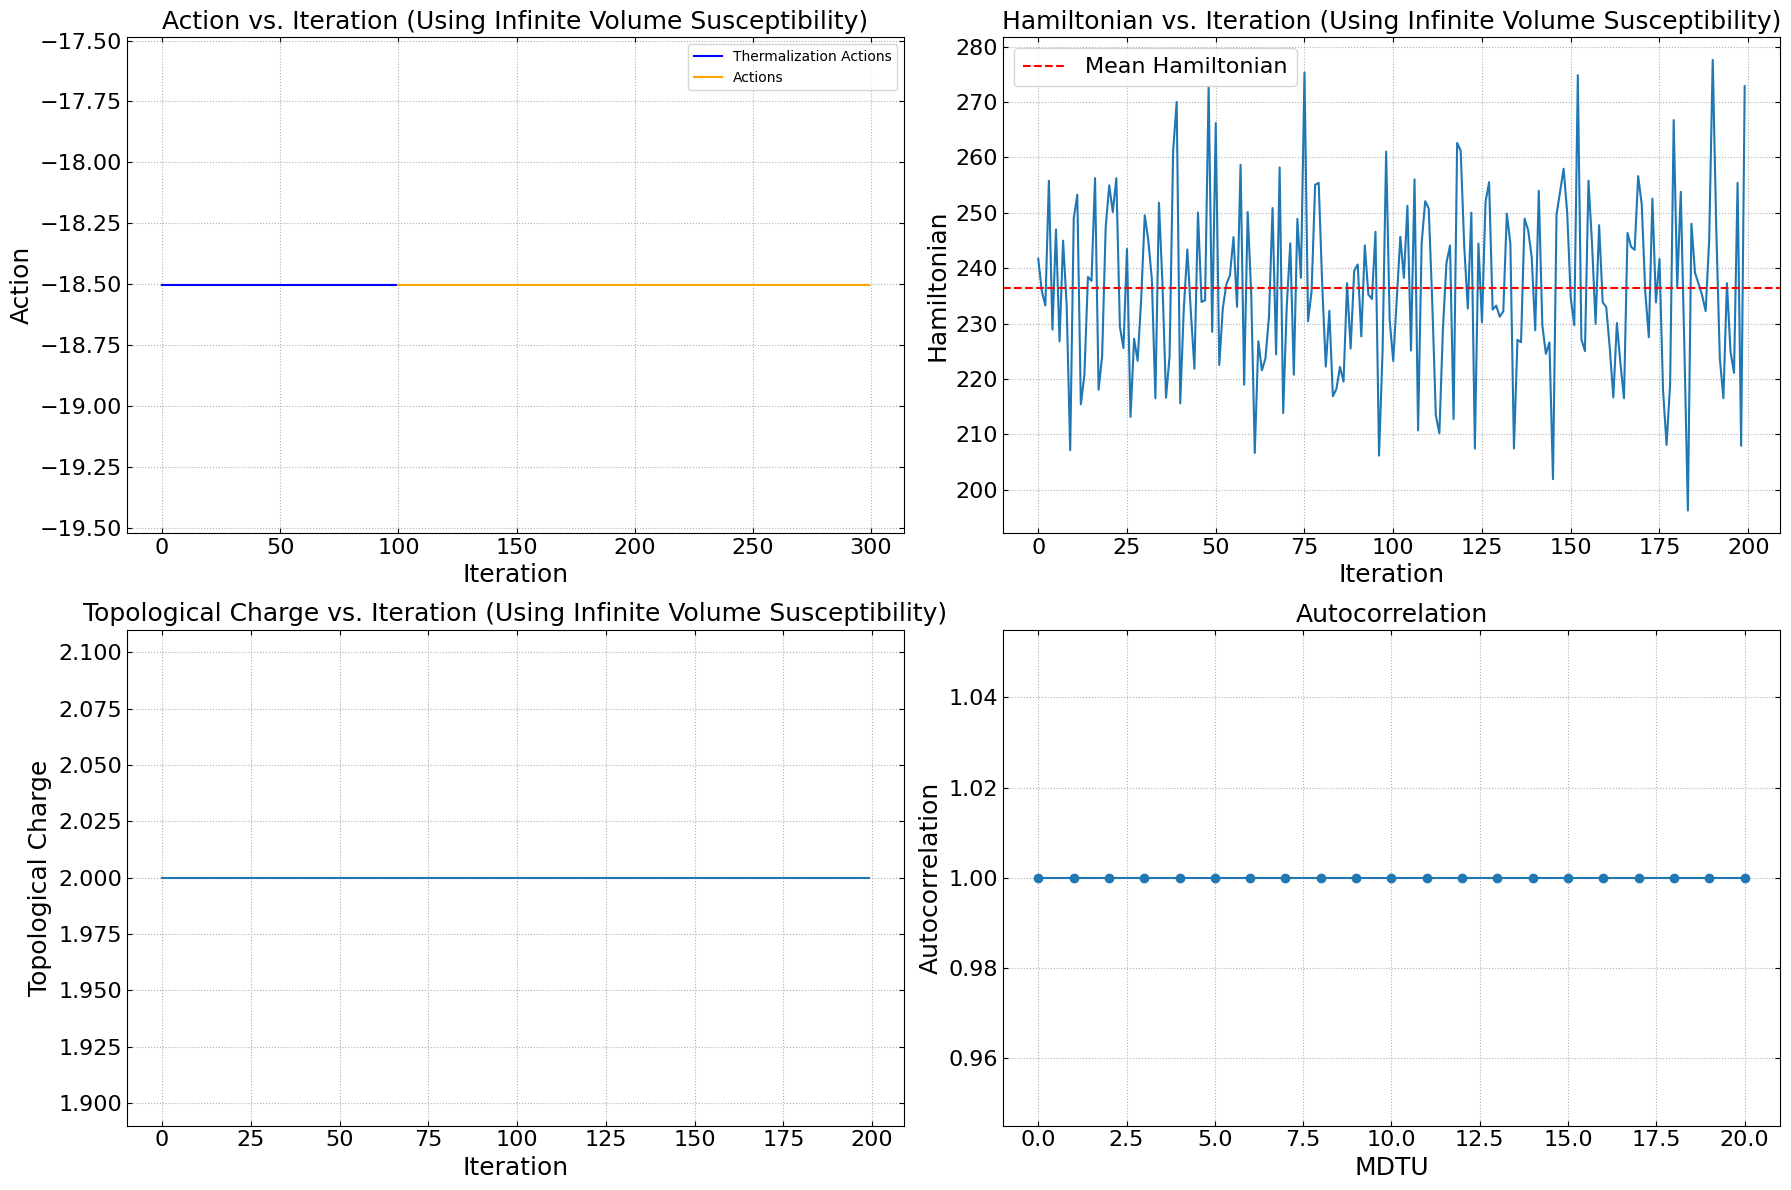

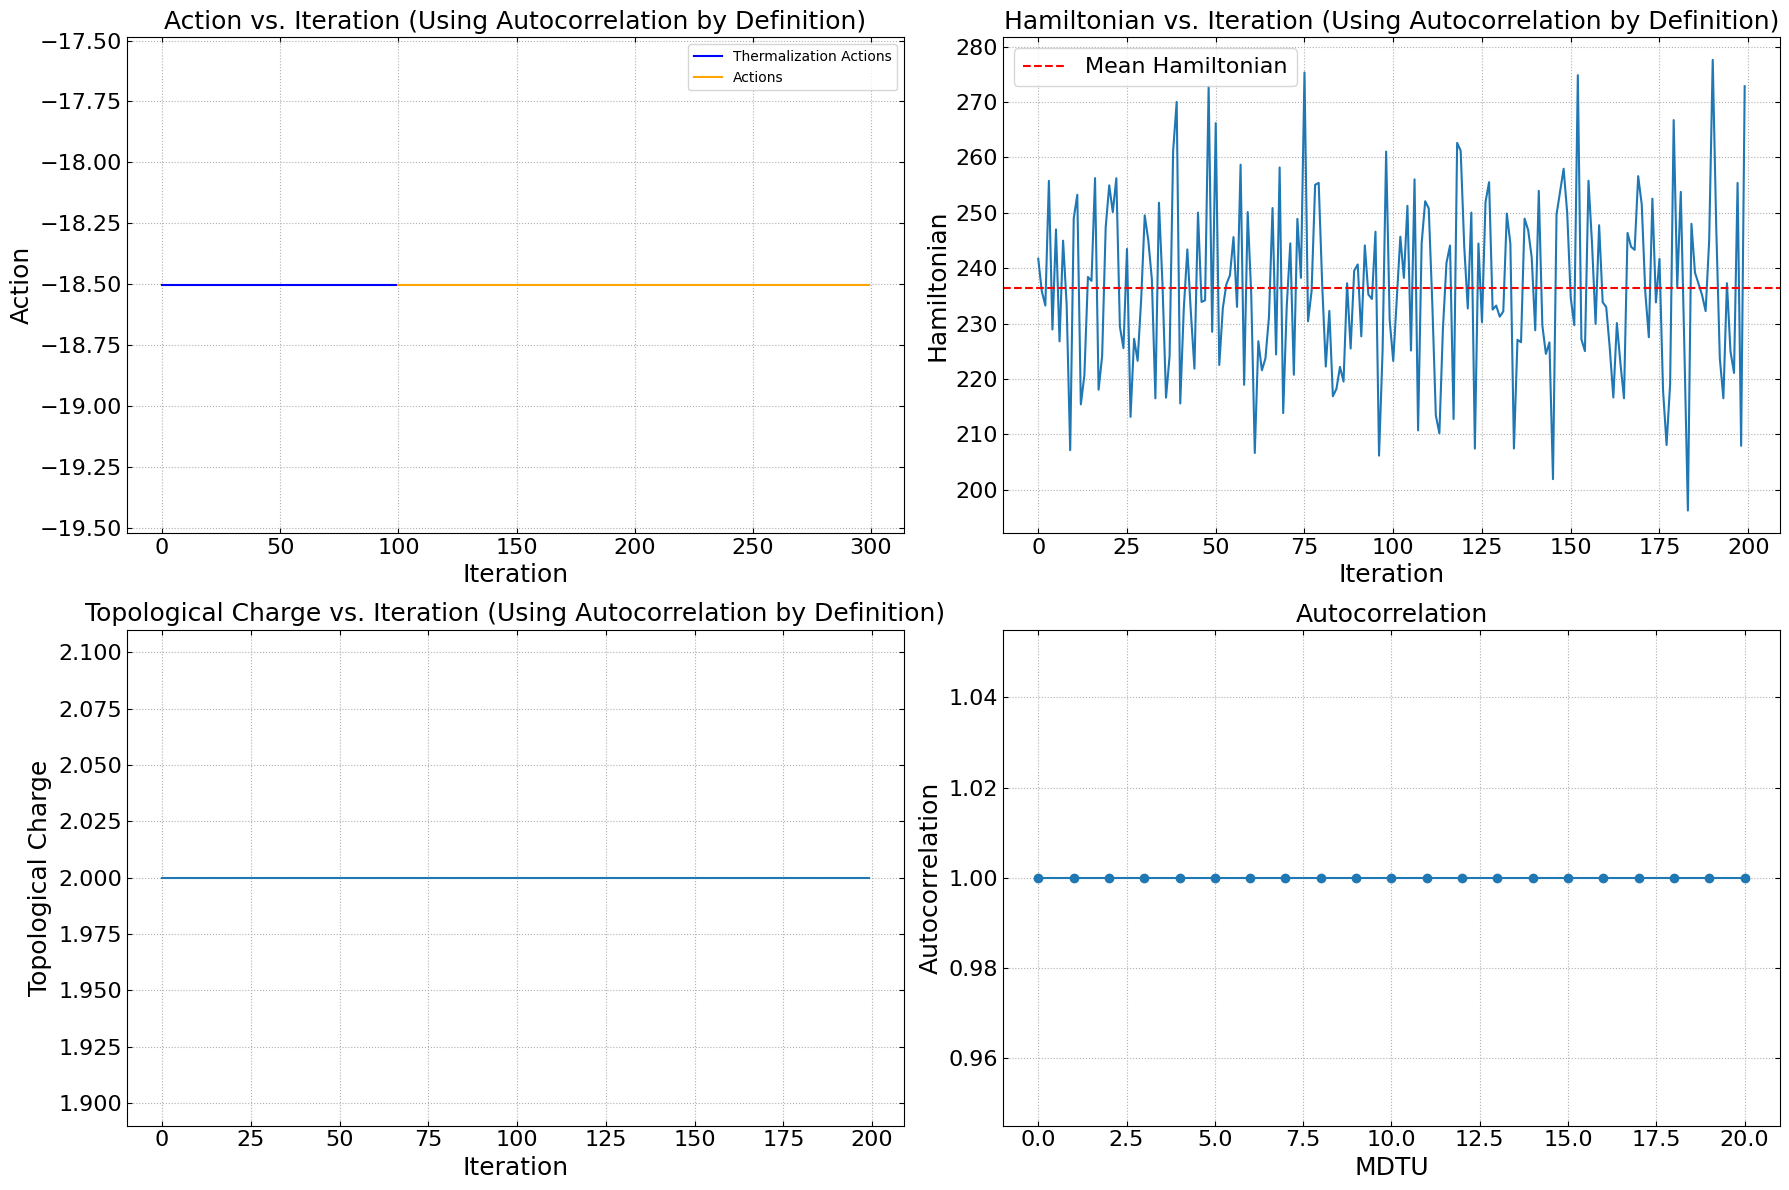

Thermalization acceptance rate: 0.0000
Acceptance rate: 0.0000
Relative variation of Hamiltonian (delta H / H_mean): 0.3441
Variation of topological charge (delta Q): 0.0000
>>> Simulation completed


In [7]:
print(">>> No Field Transformation")

# Thermalize the system
theta_thermalized, thermalization_actions, thermalization_acceptance_rate = hmc.thermalize()

# Run HMC without field transformation
final_config, actions, acceptance_rate, topological_charges, hamiltonians = hmc.run(n_iterations, theta_thermalized)

# Calculate expected and actual plaquette values
expected_plaquette = plaquette_value(beta)
real_plaquette = calculate_plaquette_from_field(final_config)
print(f"Expected plaquette value for beta = {beta}: {expected_plaquette}")
print(f"Real plaquette value from final configuration: {real_plaquette}")

# Compute autocorrelation of topological charges
max_lag = 20
autocorrelations = compute_autocorrelation(topological_charges, max_lag, beta, volume)
autocorrelations_by_def = compute_autocorrelation_by_def(topological_charges, max_lag)

# Plot results
plot_results(thermalization_actions, actions, topological_charges, hamiltonians, autocorrelations, title_suffix="(Using Infinite Volume Susceptibility)")
plot_results(thermalization_actions, actions, topological_charges, hamiltonians, autocorrelations_by_def, title_suffix="(Using Autocorrelation by Definition)")

# Print acceptance rates
print(f"Thermalization acceptance rate: {thermalization_acceptance_rate:.4f}")
print(f"Acceptance rate: {acceptance_rate:.4f}")

# Calculate and print relative change in Hamiltonian (delta H)
delta_H = np.max(hamiltonians) - np.min(hamiltonians)
H_mean = np.mean(hamiltonians)
relative_delta_H = delta_H / H_mean
print(f"Relative variation of Hamiltonian (delta H / H_mean): {relative_delta_H:.4f}")

# Calculate and print change in topological charge (delta Q)
delta_Q = np.max(topological_charges) - np.min(topological_charges)
print(f"Variation of topological charge (delta Q): {delta_Q:.4f}")

print(">>> Simulation completed")